In [5]:
# linear regression model with python
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
sns.pairplot(df)

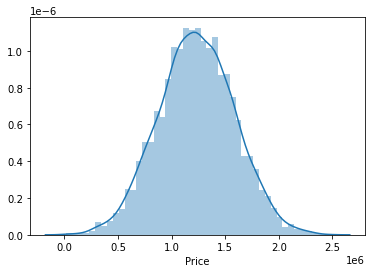

In [15]:
sns.distplot(df['Price'])

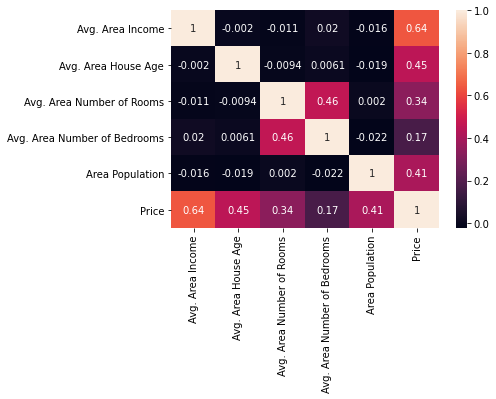

In [12]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
# seperate X and y arrays
# where X is our features and y is what we want to predict

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

In [21]:
y = df['Price']

In [24]:
# create training set and testing set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# setting up training and test sets with scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# creating linear regression object
lm = LinearRegression()

In [29]:
# fitting model to training data
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lm.intercept_)

-2640159.7968526958


In [31]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [32]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [33]:
# creating dataframe of the coefficients from X
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [34]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [35]:
# Predictions

In [36]:
# pass in X features, specifically our testing set
predictions = lm.predict(X_test)

In [37]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [38]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

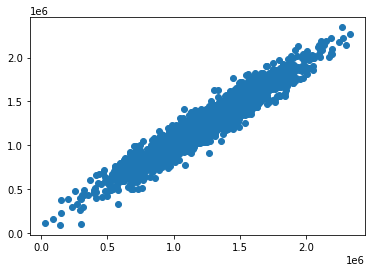

In [39]:
plt.scatter(y_test,predictions)

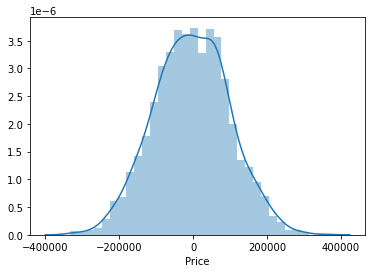

In [40]:
# plot of residuals
sns.distplot((y_test-predictions))

In [41]:
# Regression Evaluation Metrics

In [42]:
from sklearn import metrics

In [43]:
# MAE
metrics.mean_absolute_error(y_test,predictions)

82288.22251914945

In [44]:
# MSE
metrics.mean_squared_error(y_test,predictions)

10460958907.208984

In [45]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.829222909